## Optimizing Portfolio Management: Modern Portfolio Theory with Python

In [1]:
# In an effort to diversify its financial strategies and safeguard its financial future, Diogo's Delicious Chocolate Company has expanded its finance department with a dedicated team focused on portfolio management. As a newly appointed data analyst in the team, your role involves the critical task of analyzing and optimizing the company's investment portfolio. The finance department has decided to invest in the stock market and has selected a basket of 50 stocks across various sectors. The company's financial future is in your hands. By leveraging financial data analysis and statistical modeling techniques, your mission is to provide insights into the performance of this portfolio and propose strategies for optimizing returns and managing risk.


In [2]:
#Analyze financial data to determine trends and patterns that can inform investment decisions
#Perform risk analysis using methods like Value at Risk (VaR) to understand potential portfolio losses
#Determine important portfolio performance metrics such as average daily return, volatility, and Sharpe ratio
#Employ optimization techniques to find the most efficient portfolio allocation that maximizes the Sharpe ratio
#Simulate future portfolio performance using Monte Carlo simulations to provide a sense of the portfolio's potential range of outcomes
#Leverage Python and associated libraries such as Pandas, Numpy, and Matplotlib to manipulate and visualize financial data

In [3]:
#Portfolio Theory and Returns
#Optimization Techniques
#Risk Analysis
#Monte Carlo Simulation

#### Download Stock Data Using Finance

In [4]:
# Open the starter.ipynb file and run the code cells available. Import the yfinance, pandas, and numpy libraries. Using the yfinance library, download the adjusted close price for the list given of 50 stock tickers from Jan 1, 2022, to Dec 31, 2023. Store the data under a dataframe called df and preview the data.

In [5]:
# Install the yfinance library to retrieve stock data
!pip install finance

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [6]:
# Current list os stock possibilities
tickers_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'META', 'TSLA', 'BABA', 'V', 'JPM',
                'JNJ', 'WMT', 'PG', 'MA', 'UNH', 'DIS', 'NVDA', 'HD', 'PYPL', 'BAC', 
                'VZ', 'CMCSA', 'ADBE', 'KO', 'NKE', 'MRK', 'PEP', 'PFE', 'NFLX', 'T', 
                'ABT', 'ORCL', 'CRM', 'ABBV', 'CSCO', 'XOM', 'ACN', 'QCOM', 'COST', 'LLY', 
                'MCD', 'DHR', 'AVGO', 'NEE', 'TXN', 'AMGN', 'HON', 'UNP', 'LIN', 'PM', 'IBM']

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np

In [8]:
# Empty Dataframe
df = pd.DataFrame()
 
# Fetch the data
for ticker in tickers_list:
    df[ticker] = yf.download(ticker,'2022-01-01','2023-12-31')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [9]:
# Print the data for an overview
df.head()

,AAPL,GOOG,MSFT,AMZN,META,TSLA,BABA,V,JPM,JNJ,...,DHR,AVGO,NEE,TXN,AMGN,HON,UNP,LIN,PM,IBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,179.724548,145.074493,328.120880,170.404495,338.181183,399.926666,118.783234,217.630295,151.282257,161.003204,...,277.312408,625.685852,86.489532,178.312225,210.740341,197.148285,235.077957,327.978394,84.830803,122.363731
2022-01-04,177.443558,144.416504,322.494568,167.522003,336.173309,383.196655,117.974113,218.642639,157.017334,160.571442,...,269.847412,632.854675,85.564827,178.499359,211.809418,199.245605,239.119720,333.954102,85.371330,124.144699
2022-01-05,172.723587,137.653503,310.114655,164.356995,323.826416,362.706665,119.552895,216.224869,154.146729,161.641434,...,268.126038,606.518738,84.668411,174.775955,209.299408,201.209442,239.840790,335.503723,85.025734,124.324593
2022-01-06,169.840256,137.550995,307.664215,163.253998,332.107635,354.899994,124.950333,215.979172,155.784393,161.087692,...,266.914032,600.887451,80.931770,174.719818,209.327286,200.980667,240.504929,327.368164,86.319519,121.734116
2022-01-07,170.008102,137.004501,307.821014,162.554001,331.438354,342.320007,128.088150,213.237030,157.327942,163.265167,...,259.668671,584.021912,81.535675,167.871750,211.298096,205.680573,241.728882,325.692596,87.852547,121.275391


### Calculate Daily Returns

In [10]:
# Using the downloaded data, calculate the daily returns of the stocks. The daily return is defined as the percentage change in the stock price from the previous day. Eliminate any resulting NAs.

In [11]:
#Calculate the daily returns with the pct_change function from Pandas.

# Calculate the daily returns
df_returns = df.pct_change()
df_returns.head()

,AAPL,GOOG,MSFT,AMZN,META,TSLA,BABA,V,JPM,JNJ,...,DHR,AVGO,NEE,TXN,AMGN,HON,UNP,LIN,PM,IBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.012692,-0.004536,-0.017147,-0.016916,-0.005937,-0.041833,-0.006812,0.004652,0.037910,-0.002682,...,-0.026919,0.011458,-0.010692,0.001049,0.005073,0.010638,0.017193,0.018220,0.006372,0.014555
2022-01-05,-0.026600,-0.046830,-0.038388,-0.018893,-0.036728,-0.053471,0.013382,-0.011058,-0.018282,0.006664,...,-0.006379,-0.041615,-0.010476,-0.020859,-0.011850,0.009856,0.003016,0.004640,-0.004048,0.001449
2022-01-06,-0.016693,-0.000745,-0.007902,-0.006711,0.025573,-0.021523,0.045147,-0.001136,0.010624,-0.003426,...,-0.004520,-0.009285,-0.044133,-0.000321,0.000133,-0.001137,0.002769,-0.024249,0.015216,-0.020836
2022-01-07,0.000988,-0.003973,0.000510,-0.004288,-0.002015,-0.035447,0.025113,-0.012696,0.009908,0.013517,...,-0.027145,-0.028068,0.007462,-0.039195,0.009415,0.023385,0.005089,-0.005118,0.017760,-0.003768


In [12]:
#Drop the NaN that resulted from calculating the daily returns.

# The first row of df_returns will be NaN, so we can drop that row
df_returns = df_returns.dropna()
df_returns.head()

,AAPL,GOOG,MSFT,AMZN,META,TSLA,BABA,V,JPM,JNJ,...,DHR,AVGO,NEE,TXN,AMGN,HON,UNP,LIN,PM,IBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.012692,-0.004536,-0.017147,-0.016916,-0.005937,-0.041833,-0.006812,0.004652,0.037910,-0.002682,...,-0.026919,0.011458,-0.010692,0.001049,0.005073,0.010638,0.017193,0.018220,0.006372,0.014555
2022-01-05,-0.026600,-0.046830,-0.038388,-0.018893,-0.036728,-0.053471,0.013382,-0.011058,-0.018282,0.006664,...,-0.006379,-0.041615,-0.010476,-0.020859,-0.011850,0.009856,0.003016,0.004640,-0.004048,0.001449
2022-01-06,-0.016693,-0.000745,-0.007902,-0.006711,0.025573,-0.021523,0.045147,-0.001136,0.010624,-0.003426,...,-0.004520,-0.009285,-0.044133,-0.000321,0.000133,-0.001137,0.002769,-0.024249,0.015216,-0.020836
2022-01-07,0.000988,-0.003973,0.000510,-0.004288,-0.002015,-0.035447,0.025113,-0.012696,0.009908,0.013517,...,-0.027145,-0.028068,0.007462,-0.039195,0.009415,0.023385,0.005089,-0.005118,0.017760,-0.003768
2022-01-10,0.000116,0.011456,0.000732,-0.006570,-0.011212,0.030342,-0.011632,-0.023000,0.000957,-0.004944,...,0.024892,0.003246,-0.024534,0.019617,0.013551,-0.010614,-0.017662,-0.002528,0.011499,0.001483


### Plot Stock Returns with Highest Average Returns

In [13]:
#Import the seaborn and matplotlib libraries. Visualize the daily returns of a few key stocks by creating individual density plots for each. To provide a clearer visualization, you should create a FacetGrid that plots each stock in a separate subplot. This will help to better understand the distribution of daily returns of the selected stocks. For this task, focus on the stocks with the top 5 highest average daily returns.

In [14]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Find the tickers of the stocks with the highest average daily returns.
# Select a few key stocks with the highest average daily returns
key_stocks = df_returns.mean().nlargest(5).index
key_stocks

Index(['LLY', 'NVDA', 'AVGO', 'XOM', 'MRK'], dtype='object')

In [16]:
#Get the data of the tickers with the highest average daily returns.
# Subset the dataframe for only these key stocks
subset = df_returns[key_stocks]
subset.head()

,LLY,NVDA,AVGO,XOM,MRK
Date,,,,,
2022-01-04,-0.018106,-0.027589,0.011458,0.037614,0.001821
2022-01-05,-0.023088,-0.057562,-0.041615,0.012437,0.024282
2022-01-06,-0.005064,0.020794,-0.009285,0.023521,-0.000634
2022-01-07,0.000656,-0.033040,-0.028068,0.008197,0.018648
2022-01-10,0.002351,0.005615,0.003246,-0.005952,0.025778


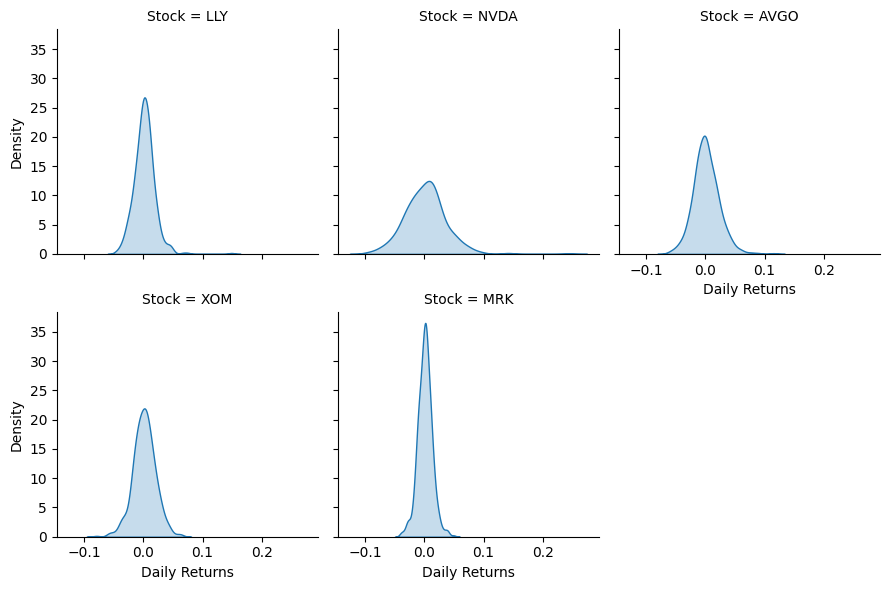

In [17]:
#Plot the data to visualize the distribution of the daily returns.

# Create FacetGrid
g = sns.FacetGrid(data=subset.melt(var_name='Stock',
                                   value_name='Daily Returns'),
                  col='Stock', 
                  col_wrap=3, #Maximum number of subplots that will be created in a single row.
                  sharex=True) #If False, each subplot will have its own x-axis.
 
# Add density plots to the FacetGrid
g.map(sns.kdeplot, #Add density plots to the FacetGrid
      'Daily Returns', # The column of the DataFrame to be plotted on the x-axis.
      fill=True) #If True, fills the area under the density curve.
 
# Display plot
plt.show()

In [18]:
# One possible conclusion is that the NVDA stock is the most volatile due to its data dispersion.

### Calculate Portfolio Returns

In [19]:
#Your task is to simulate and analyze a diversified investment portfolio. Assume an equal allocation of capital across all stocks in the portfolio. Subsequently, calculate the portfolio's daily returns by taking into account the weights of individual stocks in the portfolio and their corresponding daily returns. Your calculations will provide valuable insights into the portfolio's overall risk-return profile.

In [20]:
#Calculate the weight each stock should have, assuming similar capital allocation.

# Assume equal investment in all stocks, hence the weights are equal
weights = [1/len(df_returns.columns)] * len(df_returns.columns)
weights

[0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

In [21]:
# Compute the portfolio returns with the baseline weights and preview the portfolio return per day.

# Calculate portfolio returns
portfolio_return = df_returns.mul(weights).sum(axis=1)
portfolio_return

Date
2022-01-04   -0.002339
2022-01-05   -0.012826
2022-01-06   -0.002274
2022-01-07   -0.003172
2022-01-10   -0.000503
                ...   
2023-12-22   -0.000105
2023-12-26    0.003616
2023-12-27    0.002425
2023-12-28    0.001147
2023-12-29   -0.002420
Length: 500, dtype: float64

### Compute Portfolio Performance Metrics

In [22]:
#Your next assignment involves diving deeper into the portfolio's performance by computing key metrics. It's crucial to determine the portfolio's average daily return, the standard deviation of the daily returns (also known as portfolio volatility), and the Sharpe Ratio. These metrics are fundamental in assessing the risk-adjusted returns of your portfolio. Assume a risk-free ratio of 2% and interpret the Sharpe ratio.

In [23]:
# calculate the average return for the portfolio.

# Calculate mean of daily returns
average_daily_return = portfolio_return.mean()
print(f"Average Daily Return: {average_daily_return}")

Average Daily Return: 0.00019276986149112342


In [24]:
# compute the standard deviation of the portfolio returns.

# Calculate standard deviation of daily returns
portfolio_volatility = portfolio_return.std()
print(f"Portfolio Volatility: {portfolio_volatility}")

Portfolio Volatility: 0.01171042631893305


In [25]:
# apply the formula for the Sharpe ratio, assuming a risk-free ratio of 2%.

# Assume a risk-free rate of 2% (or 0.02) per annum
risk_free_rate = 0.02 / 252
# We divide by 252 to get the daily risk-free rate as there are 252 trading days in a year.
 
# Calculate the Sharpe Ratio
sharpe_ratio = (average_daily_return - risk_free_rate) / portfolio_volatility
 
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.009684086559914113


In [26]:
#Conclude that a negative Sharpe Ratio is not ideal. It indicates that the risk-free rate is greater than the portfolio's return, or in other words, the investment on average is losing value. It implies that the investor is taking on additional risk without experiencing the benefits of increased returns.

### Build Function for Sharpe Ratio Calculation and Optimization Constraints

In [27]:
#In this task, you'll need to define a function to calculate the Sharpe ratio given a set of portfolio weights. Remember, the Sharpe ratio is a measure of risk-adjusted return, and in this case, you want to maximize this ratio. Therefore, you'll be returning the negative of this ratio as an objective to minimize in optimization. You will also need to define your constraints and bounds for the portfolio weights. Assume risk-free rate of 0 in the function.

In [28]:
#find the number of assets to optimize.

# Number of assets in the portfolio
num_assets = df_returns.shape[1]
print(num_assets)

50


In [29]:
#create the baseline weights as an initial guess.
# Equal weights for all assets as initial guess
init_guess = [1/num_assets] * num_assets
print(init_guess)

[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


In [30]:
# define the constraints for the problem.
# Constraints: The sum of weights is 1 (all your capital is invested)
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
print(constraints)

{'type': 'eq', 'fun': <function <lambda> at 0x7fef8f839ca0>}


In [31]:
# set the boundaries for each stock for the problem.
# Boundaries: weights are between 0 (you don't hold the asset) and 1 (all capital in one asset)
bounds = [(0, 1) for _ in range(num_assets)]
print(bounds)

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


In [32]:
#create a function to minimize the Sharpe Ratio.

# Objective function to minimize (Negative Sharpe Ratio)
def neg_sharpe(weights):
    # Convert list of weights to a numpy array
    weights = np.array(weights)
 
    # Calculate the portfolio return: sum of weights * asset returns, scaled to a year (252 trading days)
    portfolio_return = np.sum(df_returns.mean() * weights) * 252
 
    # Calculate the portfolio volatility: sqrt of weights' product by the annualized covariance matrix
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(df_returns.cov() * 252, weights)))
 
    # Sharpe Ratio (assuming risk-free rate is zero for simplicity)
    sharpe_ratio = portfolio_return / portfolio_volatility
 
    # We want to maximize Sharpe Ratio, so we minimize the negative Sharpe Ratio
    return -sharpe_ratio

### Optimize Portfolio Weights to Maximize Sharpe Ratio

In [33]:
#After defining the Sharpe ratio calculation function and optimization constraints, your next task is to optimize the weights of the portfolio using these definitions. The goal is to find the optimal weights that maximize the Sharpe Ratio, or equivalently, minimize the negative Sharpe Ratio. One quick option is to use the minimize function from the scipy library.

In [34]:
from scipy.optimize import minimize

In [35]:
#Apply the minimize function including the inputs init_guess, bounds, constraints and the neg_sharpe function.

# Optimize
opt_results = minimize(neg_sharpe,
                       init_guess,
                       bounds=bounds, 
                       constraints=constraints)

In [36]:
# Preview the optimal weights.

# The optimal weights that maximize the Sharpe Ratio
optimal_weights = opt_results.x
print(optimal_weights)

[1.52409366e-16 9.54104607e-16 0.00000000e+00 4.34392442e-15
 0.00000000e+00 5.12414485e-15 6.13826594e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.79253551e-15 6.97021041e-03
 1.52945627e-15 1.26502364e-14 1.38338435e-15 0.00000000e+00
 7.60483043e-16 8.45906209e-16 0.00000000e+00 5.34263756e-15
 2.11908240e-01 0.00000000e+00 6.71854633e-15 2.89331562e-15
 0.00000000e+00 1.11970996e-16 0.00000000e+00 1.00517833e-15
 0.00000000e+00 1.79519677e-15 2.13935708e-01 1.82965554e-15
 5.03923991e-15 0.00000000e+00 3.77310299e-01 0.00000000e+00
 2.34444713e-15 1.42839983e-01 4.35480421e-15 2.35196578e-15
 1.78517055e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.91838533e-02]


### Calculate Optimized Portfolio Performance Metrics

In [37]:
#Calculate and display the key performance metrics for the optimized portfolio. This includes the daily returns of the optimized portfolio, the average daily return, the standard deviation of daily returns (volatility), and the Sharpe ratio. These metrics will provide valuable insights into the portfolio's risk-return profile after optimization. Assume a risk-free ratio of 2% and interpret the Sharpe ratio.  

In [38]:
#compute the mean of the optimized portfolio returns.

# Calculate optimized portfolio return
opt_portfolio_return = np.sum(df_returns.mean() * optimal_weights) * 252
print(f"Optimized Portfolio Return: {opt_portfolio_return}")

Optimized Portfolio Return: 0.3392828867852154


In [39]:
# calculate the volatility.

# Calculate optimized portfolio volatility
opt_portfolio_vol = np.sqrt(np.dot(optimal_weights.T, np.dot(df_returns.cov() * 252, optimal_weights)))
print(f"Optimized Portfolio Volatility: {opt_portfolio_vol}")

Optimized Portfolio Volatility: 0.17859946035160323


In [40]:
# apply the Sharpe Ratio formula, assuming a risk free rate of 2%.

# Assume a risk-free rate of 2% (or 0.02) per annum
risk_free_rate = 0.02 / 252
# We divide by 252 to get the daily risk-free rate as there are 252 trading days in a year.
 
# Calculate optimized portfolio Sharpe Ratio (assuming risk-free rate is 0)
opt_sharpe_ratio = (opt_portfolio_return - risk_free_rate) / opt_portfolio_vol
print(f"Optimized Portfolio Sharpe Ratio: {opt_sharpe_ratio}")

Optimized Portfolio Sharpe Ratio: 1.8992415824665474


In [41]:
# A Sharpe Ratio of 2.01 means that the investment is generating, on average, 2.01 units of return for every unit of risk taken, which is much higher compared to a Sharpe Ratio of 1 or below.

### Risk Analysis using Value at Risk (VaR)

In [42]:
#A crucial aspect of portfolio management is assessing the risk associated with your investment. In this task, you'll measure this risk by calculating the Value at Risk (VaR) of the optimized portfolio at two different confidence levels - 95% and 99%. This will provide a sense of the potential losses in the "worst-case scenario" over the period, assuming normal market conditions. Interpret the results.

In [43]:
#Import the norm class for scipy.stats.

from scipy.stats import norm

In [44]:
#Compute the daily returns of the optimized portfolio.

# Calculate daily returns of optimized portfolio
optimized_portfolio_daily_return = df_returns.mul(optimal_weights).sum(axis=1)

In [45]:
#Calculate the 95% confidence level of the daily returns.

# Calculate VaR at 95% confidence level
VaR_95 = norm.ppf(1-0.05,
                  np.mean(optimized_portfolio_daily_return),
                  np.std(optimized_portfolio_daily_return))
print(f"Value at Risk at 95% confidence level: {VaR_95}")

Value at Risk at 95% confidence level: 0.01983361428878387


In [46]:
# repeat the calculation for the 99% confidence interval.

# Calculate VaR at 99% confidence level
VaR_99 = norm.ppf(1-0.05,
                  np.mean(optimized_portfolio_daily_return),
                  np.std(optimized_portfolio_daily_return))
print(f"Value at Risk at 99% confidence level: {VaR_99}")

Value at Risk at 99% confidence level: 0.01983361428878387


In [47]:
#One interpretation is that, under normal market conditions, there is a 99% confidence level that the worst daily loss will not exceed 2.855% of the portfolio value. In other words, there is only a 1% chance that the daily loss will exceed 2.855% on any given day.

### Conduct Monte Carlo Simulation

In [48]:
#In order to evaluate the future performance of our optimized portfolio and assess the uncertainty inherent in our returns, it is advisable to employ a statistical technique called Monte Carlo simulation. Your task is to conduct a Monte Carlo simulation using our portfolio's returns, taking into account its mean and standard deviation. This will allow us to create a distribution of potential future portfolio values, which can provide useful insight into the portfolio's risk profile. Use 1,000 iterations and a 252-day trading year for this task. Interpret the graph.

In [49]:
# define the requirements of iterations and days of trading.

# Set the number of simulations and trading days
num_simulations = 100
num_days = 252

In [50]:
# perform the Monte Carlo simulations, having as a starting point the mean and return volatility.

# Create a list to hold the simulations
simulations = []
 
# Calculate the mean return
mean_return = optimized_portfolio_daily_return.mean()
 
# Run the simulation
for x in range(num_simulations):
    count = 0
    daily_vol = optimized_portfolio_daily_return.std()
 
    price_series = []
 
    # Start with the mean return
    price = mean_return
    price_series.append(price)
 
    # Generate returns and add them to the price
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
 
 
    simulations.append(price_series)
 
#Looking at the first simulation and its first 5 outcomes. Each simulation has 252 outcomes, one per day
simulations[0][:5]

[0.001346360661846093,
 0.001319384510788571,
 0.0013200282108634892,
 0.0013200691394788984,
 0.0013328976672330828]

In [51]:
#Convert the simulations to a dataframe and transpose to prepare for the visualization.

# Convert the list of simulations to a DataFrame and transpose it
simulation_df = pd.DataFrame(simulations).T
simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,...,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346,0.001346
1,0.001319,0.001330,0.001330,0.001327,0.001345,0.001337,0.001330,0.001362,0.001343,0.001334,...,0.001339,0.001352,0.001333,0.001360,0.001355,0.001352,0.001362,0.001333,0.001346,0.001372
2,0.001320,0.001320,0.001310,0.001340,0.001353,0.001317,0.001318,0.001374,0.001365,0.001335,...,0.001328,0.001364,0.001343,0.001335,0.001344,0.001340,0.001368,0.001331,0.001378,0.001405
3,0.001320,0.001291,0.001294,0.001371,0.001350,0.001315,0.001333,0.001364,0.001358,0.001332,...,0.001337,0.001352,0.001358,0.001332,0.001346,0.001349,0.001383,0.001340,0.001354,0.001381
4,0.001333,0.001283,0.001312,0.001370,0.001350,0.001312,0.001333,0.001384,0.001375,0.001338,...,0.001341,0.001331,0.001363,0.001319,0.001341,0.001373,0.001390,0.001353,0.001352,0.001375


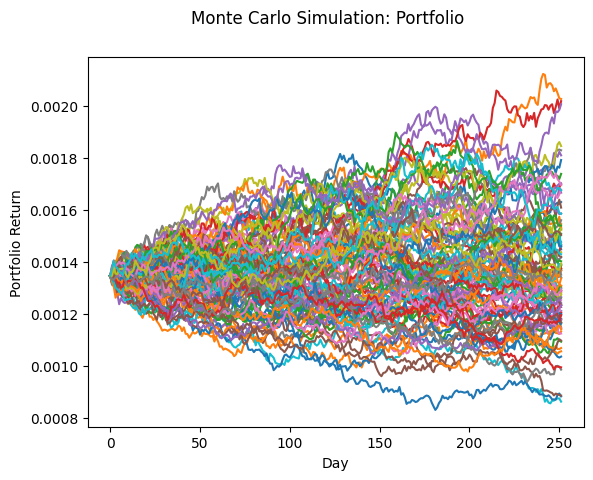

In [52]:
# Plot the results. One option is to customize the plot by specifying the xlabel, ylabel, and subtitle.

# Plot the results
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: Portfolio')
plt.plot(simulation_df)
plt.xlabel('Day')
plt.ylabel('Portfolio Return')
plt.show()